In [1]:
class padding:
    def __init__(self, image, kernel_size):
        self.pad_top = kernel_size // 2  #5//2 = 2
        self.pad_bottom = kernel_size - self.pad_top - 1  #5-2-1 = 2
        self.pad_left = kernel_size// 2
        self.pad_right = kernel_size - self.pad_left - 1
        #To avoid unnecessary gray effect at the border
    def p(self):
        #To avoid unnecessary gray effect at the border
        padded_image = np.pad(image, ((self.pad_top, self.pad_bottom), (self.pad_left, self.pad_right)), mode='constant')
        return padded_image
    
class convolution:
    def __init__(self, image, kernel, without_padd = None):
        self.m, self.n = image.shape
        self.k_m, self.k_n = kernel.shape
        if without_padd is None:
            self.result = np.zeros_like(image)
        else:
            self.result = np.zeros_like(without_padd)
        self.image = image
        self.kernel = kernel
        
    def conv(self):
        for i in range(self.m - self.k_m + 1):
            for j in range(self.n - self.k_n + 1):
                self.result[i, j] = np.sum(self.image[i:i+self.k_m, j:j+self.k_n] * self.kernel)
        return self.result
class gaussian:
    def __init__(self, window_size, sigma):
        if window_size % 2 == 0:
            raise ValueError("Window size must be odd.")

        # center of the kernel
        center = window_size // 2

        # Generating 1D Gaussian kernel
        self.kernel_1d = np.array([np.exp(-(i - center)**2 / (2 * sigma**2)) for i in range(window_size)])

        # Normalize the 1D kernel
        self.kernel_1d /= np.sum(self.kernel_1d)

    def kernel(self, window_size):
        kernel_2d = np.zeros((window_size, window_size))
        for i in range(window_size):
            for j in range(window_size):
                kernel_2d[i, j] = self.kernel_1d[i] * self.kernel_1d[j]
        return kernel_2d



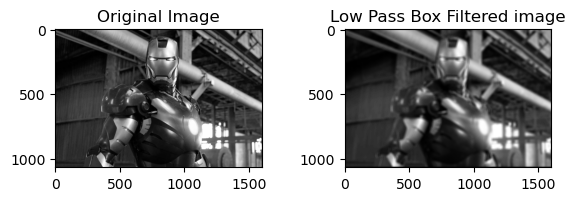

In [10]:
################Low pass box filtered image###############
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

loc = r'im3.webp'
output_dir =r'C:\Users\Tanjib Ahmed\Desktop\images'
image = cv2.imread(loc, cv2.IMREAD_GRAYSCALE)
M,N = image.shape   #M = image height, N = image width
kernel_size = 21
kernel = np.ones((kernel_size,kernel_size),np.float32)/(kernel_size*kernel_size)

padded_image = padding(image = image, kernel_size = kernel_size).p()

output = convolution(image = padded_image, kernel = kernel, without_padd = image).conv()


plt.subplot(121), plt.imshow(image, cmap = 'gray'), plt.title('Original Image')
plt.subplot(122), plt.imshow(output, cmap = 'gray'), plt.title('Low Pass Box Filtered image')
plt.subplots_adjust(wspace=0.4)
plt.show()

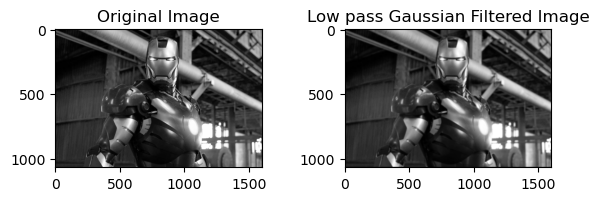

In [9]:
############gaussian low pass filter###########
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

loc = r'im3.webp'
output_dir =r'C:\Users\Tanjib Ahmed\Desktop\images'
image = cv2.imread(loc, cv2.IMREAD_GRAYSCALE)
M,N = image.shape   #M = image height, N = image width
kernel_size = 9
kernel = gaussian(window_size = kernel_size, sigma = 4).kernel(window_size = kernel_size)

padded_image = padding(image = image, kernel_size = kernel_size).p()

output = convolution(image = padded_image, kernel = kernel, without_padd = image).conv()


plt.subplot(121), plt.imshow(image, cmap = 'gray'), plt.title('Original Image')
plt.subplot(122), plt.imshow(output, cmap = 'gray'), plt.title('Low pass Gaussian Filtered Image')
plt.subplots_adjust(wspace=0.4)
plt.show()

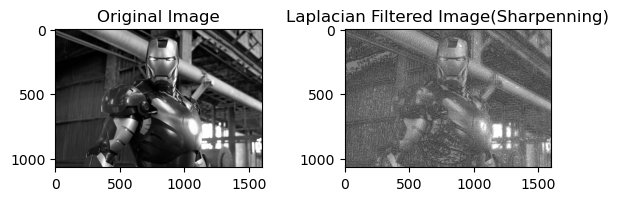

In [12]:
############## image sharpenning
############laplacian
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

loc = r'im3.webp'
output_dir =r'C:\Users\Tanjib Ahmed\Desktop\images'
image = cv2.imread(loc, cv2.IMREAD_GRAYSCALE)
kernel_size = 3
laplacian_kernel = np.array([
    [1, 1, 1],
    [1, -8, 1],
    [1, 1, 1]
])

padded_image = padding(image = image, kernel_size = kernel_size).p()

lap_output = convolution(image = padded_image, kernel = laplacian_kernel, without_padd = image).conv()

c = -1
output = image + c*lap_output


plt.subplot(121), plt.imshow(image, cmap = 'gray'), plt.title('Original Image')
plt.subplot(122), plt.imshow(output, cmap = 'gray'), plt.title('Laplacian Filtered Image(Sharpenning)')
plt.subplots_adjust(wspace=0.4)
plt.show()

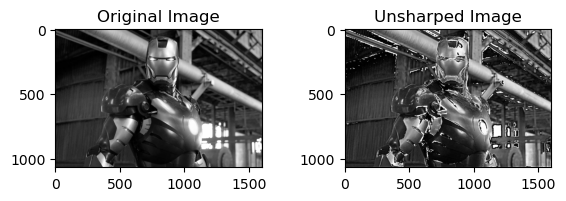

In [13]:
################unsharped image
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

loc = r'im3.webp'
output_dir =r'C:\Users\Tanjib Ahmed\Desktop\images'
image = cv2.imread(loc, cv2.IMREAD_GRAYSCALE)
M,N = image.shape   #M = image height, N = image width
kernel_size = 21
kernel = np.ones((kernel_size,kernel_size),np.float32)/(kernel_size*kernel_size)

padded_image = padding(image = image, kernel_size = kernel_size).p()

Blurred_image = convolution(image = padded_image, kernel = kernel, without_padd = image).conv()

mask = image - Blurred_image

k = 1 ##When k = 1 we have unsharp masking, as defined above. When k > 1, the process is referred to as highboost filtering. Choosing k < 1 reduces the contribution of the unsharp mask.
output = image + k*mask 


plt.subplot(121), plt.imshow(image, cmap = 'gray'), plt.title('Original Image')
plt.subplot(122), plt.imshow(output, cmap = 'gray'), plt.title('Unsharped Image')
plt.subplots_adjust(wspace=0.4)
plt.show()